Decoding images
Images may have various extensions — JPG, PNG, TIFF are common. This post focuses on JPG images only, but the process for other image formats should not be very different. The first step in the process is to read the image.

An image with a JPG extension is stored in memory as a list of dots, known as pixels. A pixel, or a picture element, represents a single dot in an image. The color of the dot is determined by a combination of three values — its three component colors (Red, Blue and Green). The color of the pixel is essentially a combination of these three component colors.

In [17]:
#import sys
# !{sys.executable} -m pip install colorthief

  Using cached colorthief-0.2.1-py2.py3-none-any.whl (6.1 kB)


In [21]:
# def get_palette(self, color_count=10, quality=10):
#         """Build a color palette.  We are using the median cut algorithm to
#         cluster similar colors.

#         :param color_count: the size of the palette, max number of colors
#         :param quality: quality settings, 1 is the highest quality, the bigger
#                         the number, the faster the palette generation, but the
#                         greater the likelihood that colors will be missed.
#         :return list: a list of tuple in the form (r, g, b)
#         """
#         pass

In [25]:
# from colorthief import ColorThief
# color_thief = ColorThief(r'C:\Users\tusha\Desktop\499.jpg')
# # get the dominant color


In [32]:
# get_points(r'C:\Users\tusha\Desktop\499.jpg')

Method 1 to extract dominant colours

In [2]:
import scipy.cluster
import sklearn.cluster
import numpy
from PIL import Image

def dominant_colors(image):  # PIL image input

    num_clusters = 10

    image = image.resize((150, 150))      # optional, to reduce time
    ar = numpy.asarray(image)
    shape = ar.shape
    ar = ar.reshape(numpy.product(shape[:2]), shape[2]).astype(float)

    kmeans = sklearn.cluster.KMeans(
        n_clusters=num_clusters,
        init="k-means++",
        max_iter=20,
        random_state=1000
    ).fit(ar)
    codes = kmeans.cluster_centers_

    vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
    counts, bins = numpy.histogram(vecs, len(codes))    # count occurrences

    colors = []
    for index in numpy.argsort(counts)[::-1]:
        colors.append(tuple([int(code) for code in codes[index]]))
    return colors                    # returns colors in order of dominance


img = Image.open(r'C:\Users\tusha\Desktop\499.jpg')
#img = img.resize((50,50))  # Small optimization
average_color = dominant_colors(img)
print(average_color)

[(73, 78, 65), (126, 62, 127), (106, 140, 36), (14, 19, 14), (44, 50, 40), (3, 2, 138), (103, 110, 90), (230, 243, 234), (198, 173, 163), (74, 129, 172)]


In [ ]:
#https://stackoverflow.com/questions/3241929/python-find-dominant-most-common-color-in-an-image : reference for the above

Method 2 to extract dominant colours and an approximation to get the number of clusters using k means 

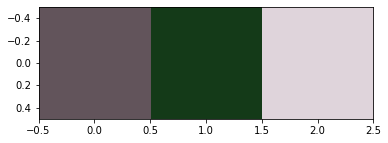

In [3]:
import matplotlib.image as img 
import matplotlib.pyplot as plt 
from scipy.cluster.vq import whiten 
from scipy.cluster.vq import kmeans 
import pandas as pd 
  
batman_image = img.imread(r'C:\Users\tusha\Desktop\499.jpg') 
  
r = [] 
g = [] 
b = [] 
for row in batman_image: 
    for temp_r, temp_g, temp_b in row: 
        r.append(temp_r) 
        g.append(temp_g) 
        b.append(temp_b) 
   
batman_df = pd.DataFrame({'red' : r, 
                          'green' : g, 
                          'blue' : b}) 
  
batman_df['scaled_color_red'] = whiten(batman_df['red']) 
batman_df['scaled_color_blue'] = whiten(batman_df['blue']) 
batman_df['scaled_color_green'] = whiten(batman_df['green']) 
  
cluster_centers, _ = kmeans(batman_df[['scaled_color_red', 
                                    'scaled_color_blue', 
                                    'scaled_color_green']], 3) 
  
dominant_colors = [] 
  
red_std, green_std, blue_std = batman_df[['red', 
                                          'green', 
                                          'blue']].std() 
  
for cluster_center in cluster_centers: 
    red_scaled, green_scaled, blue_scaled = cluster_center 
    dominant_colors.append(( 
        red_scaled * red_std / 255, 
        green_scaled * green_std / 255, 
        blue_scaled * blue_std / 255
    )) 
  
plt.imshow([dominant_colors]) 
plt.show()

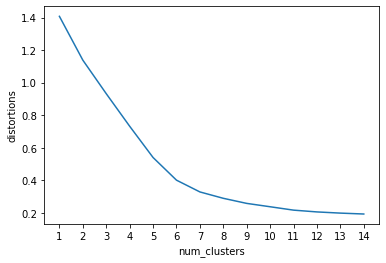

In [4]:
import seaborn as sns
# Preparing data to construct elbow plot. 
distortions = [] 
num_clusters = range(1, 15)  #range of cluster sizes 
  
# Create a list of distortions from the kmeans function 
for i in num_clusters: 
    cluster_centers, distortion = kmeans(batman_df[['scaled_color_red',  
                                                    'scaled_color_blue',  
                                                    'scaled_color_green']], i) 
    distortions.append(distortion) 
      
# Create a data frame with two lists, num_clusters and distortions 
elbow_plot = pd.DataFrame({'num_clusters' : num_clusters, 
                           'distortions' : distortions}) 
  
# Create a line plot of num_clusters and distortions 
sns.lineplot(x = 'num_clusters', y = 'distortions', data = elbow_plot) 
plt.xticks(num_clusters) 
plt.show() 

In [5]:
import matplotlib.image as img
batman_image = img.imread(r'C:\Users\tusha\Desktop\batman1.jpg') 
print(batman_image.shape) 

(126, 200, 3)


In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (126, 200, 3)


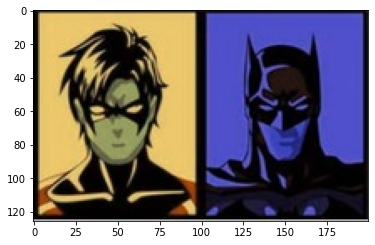

In [7]:
image = cv2.imread(r'C:\Users\tusha\Desktop\batman1.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

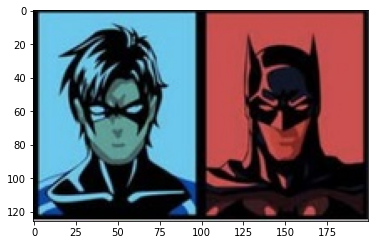

In [19]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

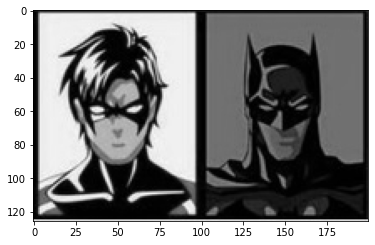

In [20]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

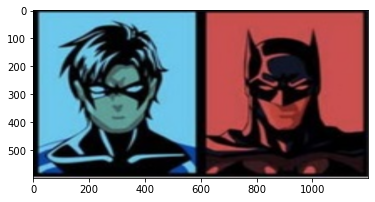

In [21]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

In [8]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))



In [9]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [10]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [11]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)